In [5]:
import h5py
import numpy as np
import os.path as osp
from PIL import Image
import random

# from all_noise import image_blur, image_brightness, image_rotation, image_translation, image_shear, image_scale, set_param, get_param, increase_brightness

In [2]:
def show_sample(dataset_path):
    dataset = (h5py.File(dataset_path))['examples']
    shown_imgs = []
    random.seed(2)
    np.random.seed(2)
    for i in random.sample(list(dataset.keys()), 5):
        imgs = dataset[i]['image']
        _shown_imgs = np.random.permutation(imgs)[:5]
        _shown_imgs = np.concatenate(_shown_imgs, axis=0)
        shown_imgs.append([_shown_imgs])
    img = np.block(shown_imgs)
    display(Image.fromarray(np.block(shown_imgs)))

In [29]:
def add_noise(dataset_path, trf):
    orig_dataset = h5py.File(dataset_path, 'r')

    trf_name = trf.__name__
    base = trf_name + '_' + osp.basename(dataset_path)
    new_path = osp.join(osp.dirname(dataset_path), base)

    with h5py.File(new_path, 'w') as new_dataset:
        new_dataset.copy(orig_dataset['examples'], 'examples')
        orig_dataset.close()
        for i in new_dataset['examples'].keys():
            imgs = new_dataset['examples'][i]['image']
            trf_imgs = []
            for img in imgs:
                trf_imgs.append(trf(img))
            trf_imgs = np.array(trf_imgs)
            new_dataset['examples'][i]['image'][...] = trf_imgs

In [30]:
set_param(7)
get_param()
dataset_path = ['datasets/fed_cifar100_train.h5', 'datasets/fed_cifar100_test.h5']

selected_trf = [image_translation]
# selected_trf = [image_rotation, image_translation, image_brightness, image_blur]
for p in dataset_path:
    for trf in selected_trf:
        print(trf.__name__)
        add_noise(p, trf)

7
image_translation
image_translation


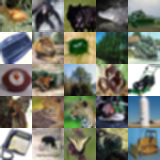

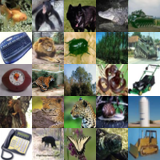

In [3]:
show_sample('datasets/image_blur_fed_cifar100_train.h5')
show_sample('datasets/fed_cifar100_train.h5')

In [13]:

import h5py
import pickle
import os
import numpy as np
def transfer_h5py_2_pickle(path):
    base_name = os.path.splitext(path)[0]
    out_name = base_name + '.pkl'
    dataset = h5py.File(path, 'r')
    total_idx = dataset['examples'].keys()
    images = {}
    labels = {}
    for idx in total_idx:
        images[idx] = dataset['examples'][idx]['image'][()]
        labels[idx] = dataset['examples'][idx]['label'][()]
    dump = {'images': images, 'labels': labels}
    with open(out_name, 'wb') as f:
        pickle.dump(dump, f)
transfer_h5py_2_pickle('datasets/image_blur_fed_cifar100_test.h5')
transfer_h5py_2_pickle('datasets/image_blur_fed_cifar100_train.h5')

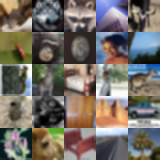

In [14]:
def show_sample_pickle(dataset_path):
    with open(dataset_path, 'rb') as f:
        dump = pickle.load(f)
    images = dump['images']
    labels = dump['labels']
    shown_imgs = []
    random.seed(2)
    np.random.seed(2)
    for i in random.sample(list(images.keys()), 5):
        imgs = images[i]
        _shown_imgs = np.random.permutation(imgs)[:5]
        _shown_imgs = np.concatenate(_shown_imgs, axis=0)
        shown_imgs.append([_shown_imgs])
    img = np.block(shown_imgs)
    display(Image.fromarray(np.block(shown_imgs)))
show_sample_pickle('datasets/image_blur_fed_cifar100_test.pkl')